# Lecture 11 Multi-Dimensional Arrays Continued and Images

### Previous lecture 

making nD-arrays

In [4]:
import numpy as np
arr_2d = np.zeros((3,3))
print(arr_2d)
# or 
arr_2d = np.reshape(np.arange(9),(3,3))
print(arr_2d)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0 1 2]
 [3 4 5]
 [6 7 8]]


getting array attributes

In [5]:
print('shape =', arr_2d.shape)
print('size =', arr_2d.size)
print('ndim =', arr_2d.ndim)

shape = (3, 3)
size = 9
ndim = 2


Accessing array data

In [6]:
# like so, [first dimension index, second dimesion index]
arr_2d[0,1]

1

In [7]:
# or a full slice of one dimension
arr_2d[:,0]

array([0, 3, 6])

Performing operations on a certain axis

In [8]:
# Sum over axis 1
print(np.sum(arr_2d, axis=1))

[ 3 12 21]


Broadcasting

In [9]:
arr_1d = np.arange(3)

# A length 3 1D array plus a (3,3) 2D array
arr_1d + arr_2d

array([[ 0,  2,  4],
       [ 3,  5,  7],
       [ 6,  8, 10]])

## New stuff for Today! 

### Using nD-arrays for calculations 

In [10]:
def grav_accel(x, y):
    '''
    Function to calculate the graviational acceleration
    from the Earth as position x and y
    inputs:
    x - x position in terms of Earth Radii 
    y - y position in terms of Earth Radii

    output:
    g - the graviational acceleration (m/s2)
    '''

    G       = 6.67e-11           # Grav. const.
    mEarth  = 5.97e24            # Earth mass
    rEarth  = 6.37e6             # Earth radius

    r = (x**2 + y**2)**0.5
    radius = r*rEarth

    g = G * mEarth / radius**2

    return g

Let's find the strength of the graviational acceleration around the Earth on a Cartesian grid of X,Y positions 

In [11]:
# Let's make these in terms of multiples of the Earth radius 
x_points = np.linspace(-6, 6, 4)
y_points = np.linspace(-3, 3, 4)
print(x_points)
print(y_points)

[-6. -2.  2.  6.]
[-3. -1.  1.  3.]


We have two sets of the positions we want, but we want all combinations of these vectors as a grid

We can use the functions np.meshgrid() to do this

In [12]:
x_grid, y_grid = np.meshgrid(x_points, y_points)
print(x_grid)
print(y_grid)

[[-6. -2.  2.  6.]
 [-6. -2.  2.  6.]
 [-6. -2.  2.  6.]
 [-6. -2.  2.  6.]]
[[-3. -3. -3. -3.]
 [-1. -1. -1. -1.]
 [ 1.  1.  1.  1.]
 [ 3.  3.  3.  3.]]


Now let's calculate the acceleration on this grid

In [13]:
g_grid = grav_accel(x_grid, y_grid)
print(g_grid)

[[0.21807646 0.75488005 0.75488005 0.21807646]
 [0.26522813 1.96268813 1.96268813 0.26522813]
 [0.26522813 1.96268813 1.96268813 0.26522813]
 [0.21807646 0.75488005 0.75488005 0.21807646]]


Let's print this out with the x,y coordinates 

In [14]:
for i in range(x_grid.shape[0]):
    for j in range(y_grid.shape[1]):
        print('g = {:.2f} m/s2 at x = {:.1f}, y = {:.1f}'.format(g_grid[i,j], x_grid[i,j], y_grid[i,j]))

g = 0.22 m/s2 at x = -6.0, y = -3.0
g = 0.75 m/s2 at x = -2.0, y = -3.0
g = 0.75 m/s2 at x = 2.0, y = -3.0
g = 0.22 m/s2 at x = 6.0, y = -3.0
g = 0.27 m/s2 at x = -6.0, y = -1.0
g = 1.96 m/s2 at x = -2.0, y = -1.0
g = 1.96 m/s2 at x = 2.0, y = -1.0
g = 0.27 m/s2 at x = 6.0, y = -1.0
g = 0.27 m/s2 at x = -6.0, y = 1.0
g = 1.96 m/s2 at x = -2.0, y = 1.0
g = 1.96 m/s2 at x = 2.0, y = 1.0
g = 0.27 m/s2 at x = 6.0, y = 1.0
g = 0.22 m/s2 at x = -6.0, y = 3.0
g = 0.75 m/s2 at x = -2.0, y = 3.0
g = 0.75 m/s2 at x = 2.0, y = 3.0
g = 0.22 m/s2 at x = 6.0, y = 3.0


Let's try using more data points

If we do this, a list of values becomes hard to read. Let's instead create a plot to vizualize the 2D array instead. 

In [15]:
# Let's make these in terms of multiples of the Earth radius 
x_points = np.linspace(-60, 60, 40)
y_points = np.linspace(-30, 30, 40)

x_grid, y_grid = np.meshgrid(x_points, y_points)

g_grid = grav_accel(x_grid, y_grid)

We can vizualize a 2D array with the pyplot function, imshow()

This will show a color corresponding to a value at each position in 2D

We can then use the plt.colorbar() function to create a colobar to the side that shows what value each color represents

Text(0, 0.5, 'y (Earth radii)')

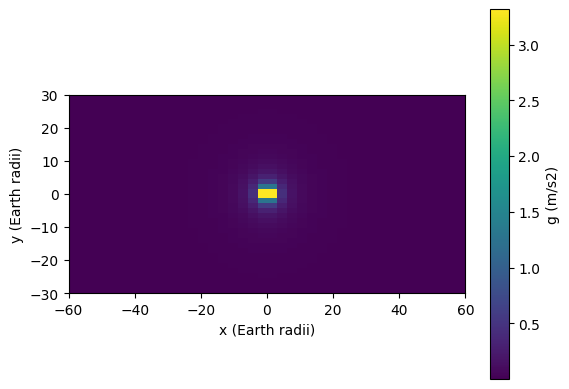

In [16]:
import matplotlib.pyplot as plt

# imshow takes a 2D array
# there's several optional kwargs
# a useful one is extent that gives the corners of the figure (otherwise it will just use array indexes)
extent = [x_grid.min(), x_grid.max(), y_grid.min(), y_grid.max()]

# origin specifies where g_grid[0,0] is, lower means it's in the bottom left corner
plt.imshow(g_grid, extent=extent, origin='lower')

# colorbar, no required arguments but you can label in with the label kwarg
plt.colorbar(label='g (m/s2)')

plt.xlabel('x (Earth radii)')
plt.ylabel('y (Earth radii)')

We can also add a contour to our plot

A contour is a line that connects equal values

Text(0, 0.5, 'y (Earth radii)')

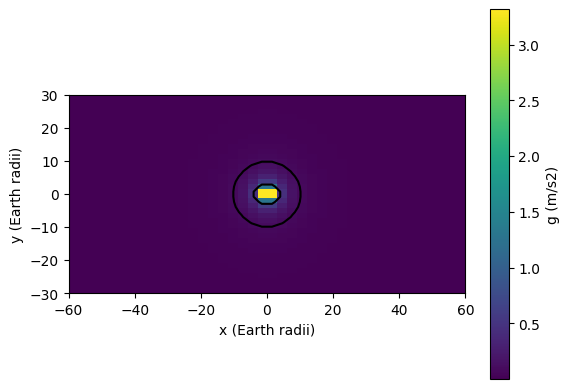

In [17]:
plt.imshow(g_grid, extent=extent, origin='lower')

# colorbar, no required arguments but you can label in with the label kwarg
plt.colorbar(label='g (m/s2)')

# plt.contour takes the same 2D array as imshow, and a list of where to make the contours
levels = [0.1,1]
plt.contour(g_grid, levels, extent=extent, colors='black')

plt.xlabel('x (Earth radii)')
plt.ylabel('y (Earth radii)')

You could also make a plot with just the contours

Text(0, 0.5, 'y (Earth radii)')

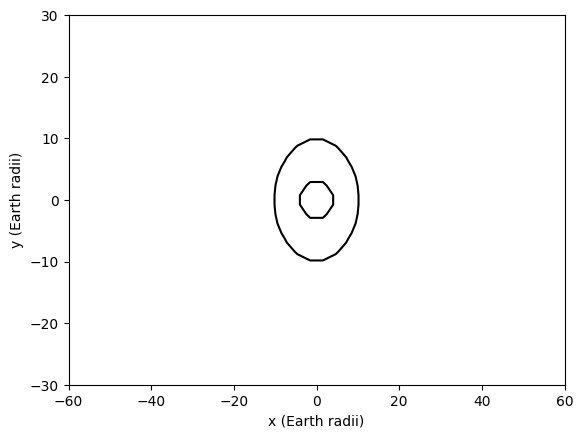

In [18]:
levels = [0.1, 1]
plt.contour(g_grid, levels, extent=extent, colors='black')

plt.xlabel('x (Earth radii)')
plt.ylabel('y (Earth radii)')

You can also specify the colarmap used

Text(0, 0.5, 'y (Earth radii)')

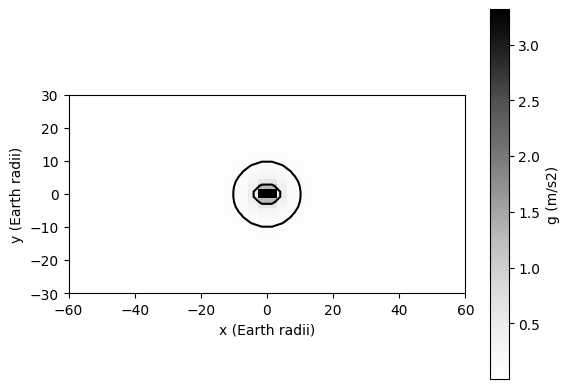

In [19]:
# using the cmap kwarg in plt.imshow()
plt.imshow(g_grid, extent=extent, cmap='Greys', origin='lower')

# colorbar, no required arguments but you can label in with the label kwarg
plt.colorbar(label='g (m/s2)')

# plt.contour takes the same 2D array as imshow, and a list of where to make the contours
levels = [0.1, 1]
plt.contour(g_grid, levels, extent=extent, colors='black')

plt.xlabel('x (Earth radii)')
plt.ylabel('y (Earth radii)')

You can also use maplotlib.cm then cm.ColormapName instead of a string

Text(0, 0.5, 'y (Earth radii)')

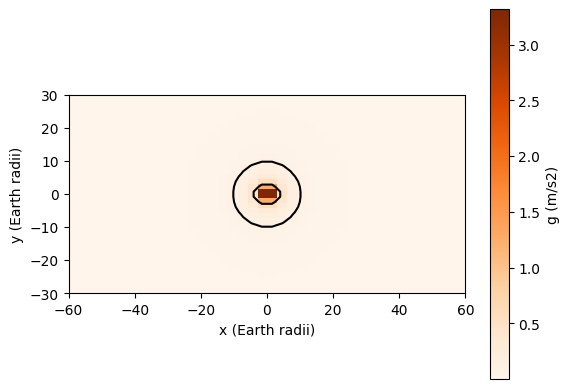

In [20]:
from matplotlib import cm

# using the cmap kwarg in plt.imshow()
plt.imshow(g_grid, extent=extent, cmap=cm.Oranges, origin='lower')

# colorbar, no required arguments but you can label in with the label kwarg
plt.colorbar(label='g (m/s2)')

# plt.contour takes the same 2D array as imshow, and a list of where to make the contours
levels = [0.1, 1]
plt.contour(g_grid, levels, extent=extent, colors='black')

plt.xlabel('x (Earth radii)')
plt.ylabel('y (Earth radii)')

You can try out some colormaps like this

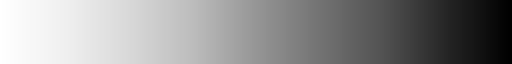

In [21]:
cm.Grays

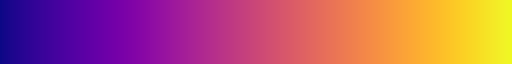

In [22]:
cm.plasma

You can set a scale for the colormap using norm

Here let's set it to a log scale using the function LogNorm from matplot.colors

You'll see that a log scale helps you differentiate the small values

Text(0, 0.5, 'y (Earth radii)')

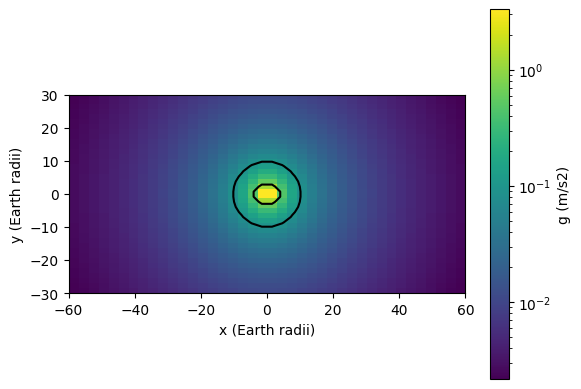

In [23]:
from matplotlib.colors import LogNorm

plt.imshow(g_grid, extent=extent, norm=LogNorm(), origin='lower')

# colorbar, no required arguments but you can label in with the label kwarg
plt.colorbar(label='g (m/s2)')

# plt.contour takes the same 2D array as imshow, and a list of where to make the contours
levels = [0.1, 1]
plt.contour(g_grid, levels, extent=extent, colors='black')

plt.xlabel('x (Earth radii)')
plt.ylabel('y (Earth radii)')

### Exercise

Make your own version of the g(x,y) plot. Pick a new colormap, 3 levels to make contours at, and a new color(s) for the contours.  

To see how to pick a color for your contours, check out the documentation here https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html

You can also check out the colormaps here https://matplotlib.org/stable/users/explain/colors/colormaps.html


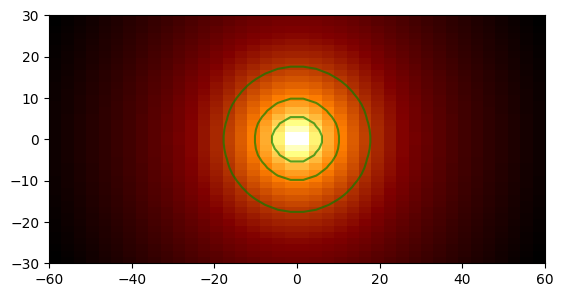

In [24]:
plt.imshow(g_grid, extent=extent, norm=LogNorm(), cmap=cm.afmhot, origin='lower')

levels = [10**-1.5, 10**-1, 10**-0.5]
plt.contour(g_grid, levels, extent=extent, colors='green', alpha=0.65)

### Images

Let's download an image. You can do that with either through some special commands, through your browser, or some other special commands that let's you download it straight into a Python object

You can download it this way, it will download it to the same directory your notebook is in

In [35]:
#%%bash 
#wget https://stsci-opo.org/STScI-01EVVBEMGZCVS2PFV8DP9ZX5R8.png
import subprocess
subprocess.run(["powershell", "iwr -outf image.png https://stsci-opo.org/STScI-01EVVBEMGZCVS2PFV8DP9ZX5R8.png"])

CompletedProcess(args=['powershell', 'iwr -outf image.png https://stsci-opo.org/STScI-01EVVBEMGZCVS2PFV8DP9ZX5R8.png'], returncode=0)

Then open the file using pyplot.imread(file_name)

In [36]:
image = plt.imread('image.png')

You can also download it through your browser 

If that doesn't work for you, you can also try this 

In [ ]:
#import requests
#from io import BytesIO
#
#with requests.get('https://static.sniffspot.com/packs/img/dog-pool-581.ebe279a8c368d609.png') as response:
#    image = plt.imread(BytesIO(response.content))
#

Ok, so we've got our PNG image now, so what is an image?

In [37]:
print(type(image))

<class 'numpy.ndarray'>


In [38]:
image.ndim

3

In [39]:
image.shape

(2000, 2000, 4)

Images are 3D arrays

The first 2 axes signify the position in the image

The 3rd axis gives use the RedGreenBlue (RGB) values to give us color

along with a forth number (a, RGBa) that specifies the transparency of the pixel

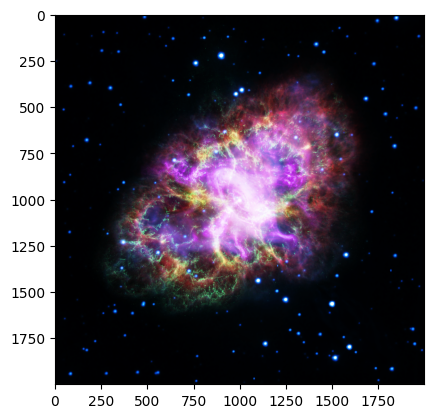

In [40]:
#imshow knows how to handle 3D arrays like this

plt.imshow(image)

Let's slice the image to only get one of the colors

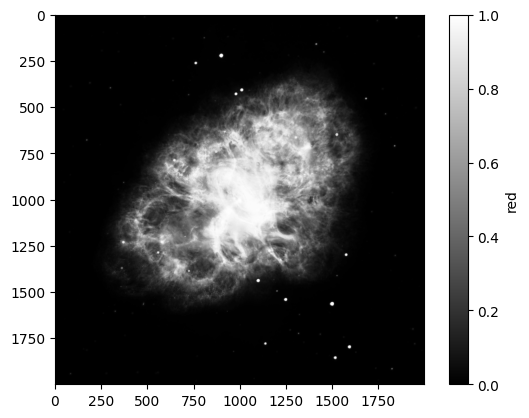

In [41]:
# Let's find how intense the reds are
plt.imshow(image[:,:,0], cmap='grey')
plt.colorbar(label='red')

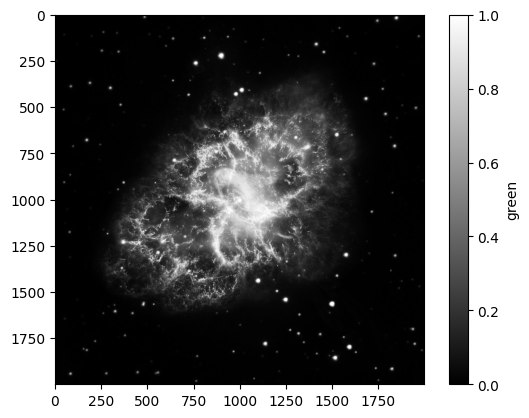

In [42]:
# how about the greens
plt.imshow(image[:,:,1], cmap='grey')
plt.colorbar(label='green')

Astronomical images are going to be different though. 

For an astronomical image the color is typically related to the number of photons detected (not the color/energy of the photons)

You can have astro images that taken by instruments or through filters that are centered at different wavelengths though

If we took a image with a red filter, it may look more like this, though it's still not really plotting how bright things are

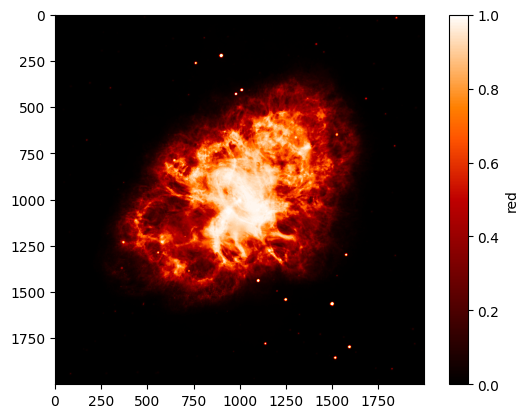

In [54]:
plt.imshow(image[:,:,0], cmap=cm.gist_heat)
plt.colorbar(label='red')

We'll be look at some astronomical images during next lecture